In [1]:
import mysql.connector

In [2]:
#establishing connection between SQL database and jupyter notebook
mydb = mysql.connector.connect(
host = "172.31.37.112",
user = "capital_user",
password = "N@ewGi453@2",
db = "capital_v2"
)


In [3]:
print(mydb.is_connected())

True


In [4]:
#creating cursor for SQL
cur = mydb.cursor()

In [5]:
cur.execute("SELECT * FROM `raw_kpi_data` WHERE `sector_code` LIKE '%FINS%' AND `kpi_code` = 'ghg-1' LIMIT 5000")

In [6]:
data = cur.fetchall()

In [7]:
sequence = cur.column_names

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt


In [9]:
pd.DataFrame(data, columns = sequence)

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
0,1422,GHG-1,JPMORG00001,USA,2018,None,83101,MTCO2e,83101,MTCO2E,...,FINS,S017,ncx,API-27035,None,None,None,2020-12-21 11:37:47,2020-12-21 11:37:47,10.0
1,4546,GHG-1,BANKOF00001,USA,2018,None,62258,MTCO2E,62258,MTCO2E,...,FINS,S017,ncx,API-26797,None,None,None,2020-12-21 11:01:15,2022-09-06 09:37:01,10.0
2,7386,GHG-1,WELLSF00001,USA,2018,None,95316,MTCO2e,95316,MTCO2E,...,FINS,S017,ncx,API-41234,None,None,None,2022-04-21 15:23:07,2022-04-21 16:48:53,10.0
3,17042,GHG-1,ROYALB00001,CAN,2018,None,24174,MTCO2e,24174,MTCO2E,...,FINS,S017,ncx,API-26919,None,None,None,2020-12-21 19:15:34,2022-04-19 11:57:27,NaN
4,19314,GHG-1,TORONT00001,CAN,2018,None,53270,MTCO2E,53270,MTCO2E,...,FINS,S005,ncx,API-26845,None,None,None,2020-12-21 10:33:41,2020-12-21 10:33:41,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,33389074,GHG-1,INVEST00001,SWE,2022,None,11,MTCO2e,11,MTCO2E,...,FINS,S005,ncx,API-158060,2023-05-31,None,None,2023-06-01 11:04:52,NaT,NaN
3248,33390372,GHG-1,AVIVAX00001,GBR,2022,None,8526,MTCO2e,8526,MTCO2E,...,FINS,S005,ncx,API-159038,2023-06-02,None,None,2023-06-02 07:36:38,NaT,NaN
3249,33391308,GHG-1,BUREEQ00001,SWE,2020,None,0,MTCO2e,0,MTCO2E,...,FINS,S005,ncx,API-159156,None,None,None,2023-06-02 15:37:20,NaT,NaN
3250,33391322,GHG-1,BUREEQ00001,SWE,2022,None,0,MTCO2e,0,MTCO2E,...,FINS,S005,ncx,API-159154,None,None,None,2023-06-02 15:37:52,NaT,NaN


In [10]:
df = pd.DataFrame(data, columns = sequence)

In [11]:
df = df.astype({'converted_data': 'float'})

In [12]:
df["converted_data"].dtypes

dtype('float64')

In [13]:
cf.go_offline()
df[["converted_data"]].iplot(kind = 'scatter')

In [14]:
df["converted_data"].describe()

count    3.252000e+03
mean     4.545096e+04
std      7.868651e+05
min      0.000000e+00
25%      1.540000e+02
50%      1.453670e+03
75%      7.456052e+03
max      2.044594e+07
Name: converted_data, dtype: float64

In [15]:
#observing above outlier data points
df.loc[1860:1870, ['id','company_code','converted_data']]

,id,company_code,converted_data
1860,32295684,IPGROU00001,4.70
1861,32295838,VTBBAN00001,7203.20
1862,32296415,SABANC00001,16560630.00
1863,32296416,SABANC00001,18601123.00
1864,32296417,SABANC00001,19976890.00
1865,32296493,SABANC00001,17379026.00
1866,32296710,SABANC00001,16346750.00
1867,32296835,SABANC00001,20445939.29
1868,32296869,ASHMOR00001,35.10
1869,32296870,ASHMOR00001,43.00


In [16]:
#dropping data point from index no. 1862 to 1868 because the company with company code SABANC00001 does not fall in FINS sector according to the market research, it falls under Conglomerate sector.
df1 = df.drop(df.index[1862:1868], axis = 0)

In [17]:
df1

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
0,1422,GHG-1,JPMORG00001,USA,2018,None,83101,MTCO2e,83101.0,MTCO2E,...,FINS,S017,ncx,API-27035,None,None,None,2020-12-21 11:37:47,2020-12-21 11:37:47,10.0
1,4546,GHG-1,BANKOF00001,USA,2018,None,62258,MTCO2E,62258.0,MTCO2E,...,FINS,S017,ncx,API-26797,None,None,None,2020-12-21 11:01:15,2022-09-06 09:37:01,10.0
2,7386,GHG-1,WELLSF00001,USA,2018,None,95316,MTCO2e,95316.0,MTCO2E,...,FINS,S017,ncx,API-41234,None,None,None,2022-04-21 15:23:07,2022-04-21 16:48:53,10.0
3,17042,GHG-1,ROYALB00001,CAN,2018,None,24174,MTCO2e,24174.0,MTCO2E,...,FINS,S017,ncx,API-26919,None,None,None,2020-12-21 19:15:34,2022-04-19 11:57:27,NaN
4,19314,GHG-1,TORONT00001,CAN,2018,None,53270,MTCO2E,53270.0,MTCO2E,...,FINS,S005,ncx,API-26845,None,None,None,2020-12-21 10:33:41,2020-12-21 10:33:41,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,33389074,GHG-1,INVEST00001,SWE,2022,None,11,MTCO2e,11.0,MTCO2E,...,FINS,S005,ncx,API-158060,2023-05-31,None,None,2023-06-01 11:04:52,NaT,NaN
3248,33390372,GHG-1,AVIVAX00001,GBR,2022,None,8526,MTCO2e,8526.0,MTCO2E,...,FINS,S005,ncx,API-159038,2023-06-02,None,None,2023-06-02 07:36:38,NaT,NaN
3249,33391308,GHG-1,BUREEQ00001,SWE,2020,None,0,MTCO2e,0.0,MTCO2E,...,FINS,S005,ncx,API-159156,None,None,None,2023-06-02 15:37:20,NaT,NaN
3250,33391322,GHG-1,BUREEQ00001,SWE,2022,None,0,MTCO2e,0.0,MTCO2E,...,FINS,S005,ncx,API-159154,None,None,None,2023-06-02 15:37:52,NaT,NaN


In [18]:
df1['converted_data'].describe()

count    3.246000e+03
mean     1.185957e+04
std      6.212537e+04
min      0.000000e+00
25%      1.540000e+02
50%      1.447000e+03
75%      7.410960e+03
max      1.389000e+06
Name: converted_data, dtype: float64

In [19]:
df1['converted_data'].iplot()

In [20]:
#sector check for companies where values are shooting or appearing outlier, using index filter. 
df1.loc[[24,34,111,488,601,911, 971, 1111, 1562,1626], ['company_code', 'converted_data']]

,company_code,converted_data
24,MANULI00001,705994.0
34,ORIXCO00001,907345.0
111,MANULI00001,464258.0
488,MANULI00001,714636.0
601,ORIXCO00001,1138570.0
911,ORIXCO00001,987771.0
971,MANULI00001,555933.0
1111,SUMITO00002,934276.0
1562,JAPANP00001,872102.0
1626,SUMITO00002,1389000.0


In [21]:
#Droping SUMITO00002 because acording to market research, this company lies under 'conglomerate sector'.
df1[df1['company_code']=='SUMITO00002']

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
1111,21924309,GHG-1,SUMITO00002,JPN,2018,None,934276,MTCO2E,934276.0,MTCO2E,...,FINS,S017,ncx,API-54485,None,None,None,2022-04-26 15:12:57,2022-04-26 15:13:51,NaN
1112,21924310,GHG-1,SUMITO00002,JPN,2019,None,939346,MTCO2E,939346.0,MTCO2E,...,FINS,S017,ncx,API-54485,None,None,None,2022-04-26 15:12:57,2022-04-26 15:13:51,NaN
1626,31881918,GHG-1,SUMITO00002,JPN,2022,None,1389,Thousand MTCO2e,1389000.0,MTCO2E,...,FINS,S017,ncx,API-79612,None,None,None,2022-10-10 11:12:46,NaT,NaN


In [22]:
#Data cleaning:Droping SUMITO00002 because acording to market research, this company lies under 'conglomerate sector'.
df2 = df1.drop(df1[(df1['company_code']=='SUMITO00002')].index)

In [23]:
df2['converted_data'].iplot()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='converted_data'>

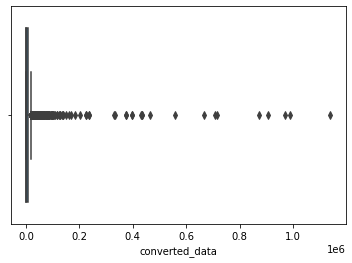

In [24]:
#OutLiers:
#1. using 'box-plot'
sns.boxplot(df2['converted_data'])

In [25]:
#from above observation, the values beyond ~250000 are outliers.
print(np.where(df2['converted_data']>250000))
# following output gives outlier values.

(array([  24,   34,  111,  488,  601,  911,  971, 1532, 1557, 1558, 1559,
       1560, 1779, 1780, 1781, 1782, 1783, 1784, 1790], dtype=int64),)


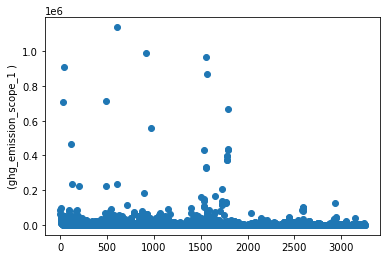

In [26]:
#2. Using Scatterplot:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df2.index,df2['converted_data'])
 
# y-axis label
ax.set_ylabel('(ghg_emission_scope_1 )')
plt.show()

In [27]:
#3. IQR(Inner Quartile Range)
# Calculate the upper and lower limits
Q1 = df1['converted_data'].quantile(0.25)
Q3 = df1['converted_data'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df1['converted_data']>=upper)[0]
lower_array = np.where(df1['converted_data']<=lower)[0]
 
# Removing the outliers
df1.drop(index=upper_array, inplace=True)
df1.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df1.shape)

New Shape:  (2864, 22)


In [28]:
df1.describe()

,id,converted_data,updated_by
count,2.864000e+03,2864.000000,705.0
mean,2.739179e+07,3492.668048,10.0
std,7.265468e+06,6913.013144,0.0
min,2.158600e+04,0.000000,10.0
25%,2.186221e+07,111.502500,10.0
50%,3.191104e+07,987.600000,10.0
75%,3.241034e+07,4101.495000,10.0
max,3.339132e+07,127765.000000,10.0


In [29]:
Q1

154.0

In [30]:
Q3

7410.96

In [31]:
Benchmark = IQR/2

In [32]:
# Scope 1 GHG emission Benchmark of Financial sector
Benchmark

3628.48